In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
!wget https://habrastorage.org/r/w1560/storage2/d7e/95c/c9a/d7e95cc9a4a5f1f571ef1f3b3521ede4.jpg -O seam_carving.png

--2024-11-15 21:21:39--  https://habrastorage.org/r/w1560/storage2/d7e/95c/c9a/d7e95cc9a4a5f1f571ef1f3b3521ede4.jpg
Resolving habrastorage.org (habrastorage.org)... 2a01:4f9:4a:2897::5fd9:6b0c, 2a01:4f9:3b:48e8::4115:7879, 45.120.177.159
Connecting to habrastorage.org (habrastorage.org)|2a01:4f9:4a:2897::5fd9:6b0c|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48253 (47K) [image/jpeg]
Saving to: ‘seam_carving.png’

seam_carving.png    100%[===================>]  47,12K  --.-KB/s    in 0,09s   

2024-11-15 21:21:39 (552 KB/s) - ‘seam_carving.png’ saved [48253/48253]



In [19]:
img = cv2.imread("seam_carving.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [20]:
!rm -f seam_carving.png

In [43]:
def calculate_energy(img):
    energy = cv2.Scharr(img, -1, 1, 0) + cv2.Scharr(img, -1, 0, 1)
    return np.mean(energy, axis=0)

def calculate_energy_seam(img, energies, axis=0):
    energy_seam = np.empty_like(energies)
    energy_seam[0, :] = energies[0, :]
    for i in range(1, img.shape[1]):
        for j in range(0, img.shape[2]):
            acc = energy_seam[i - 1, j]
            if j > 0 and energy_seam[i - 1, j - 1] < acc:
                acc = energy_seam[i - 1, j - 1]
            if j < img.shape[2] - 1 and energy_seam[i - 1, j + 1] < acc:
                acc = energy_seam[i - 1, j + 1]
            
            acc += energies[i, j]

    return energy_seam
    

def calculate_min_seam_indices(energies):
    index_list = [(energies.shape[1] - 1, np.argmin(energies[energies.shape[1] - 1]))]
    for i in range(energies.shape[1] - 2, -1, -1): # vertical seam
        prev_index = index_list[-1][1]
        current = energies[i, prev_index]
        if prev_index > 0 and energies[i, prev_index - 1] < current:
            current = energies[i, prev_index - 1]
        if prev_index < energies.shape[1] - 1 and energies[i, prev_index + 1] < current:
            current = energies[i, prev_index + 1]
    
    return index_list
        
def seam_carving(img, n_seams):
    for i in range(n_seams):
        energies = calculate_energy(img)
        seam_energies = calculate_energy_seam(img, energies)
        min_seam_indices = calculate_min_seam_indices(seam_energies)

        for idx in min_seam_indices:
            img[:, *idx] = 0
    
    return img

(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)
(480, 3)


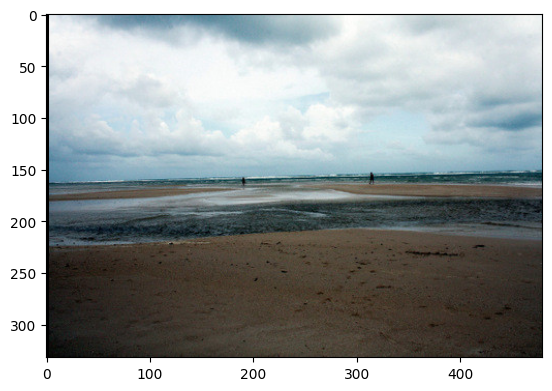

In [44]:
carved_img = seam_carving(img, 50)
plt.imshow(carved_img)